## Gradient Boost

In [114]:
import pandas as pd
import numpy as np
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [4]:
data = pd.read_csv('gbm-data.csv')

In [5]:
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [10]:
np_data = np.array(data.values)
data_train, data_test = train_test_split(np_data, test_size=0.8, random_state=241)

In [26]:
X_train = data_train[:, 1:-1]
y_train = data_train[:, 0]

X_test = data_test[:, 1:-1]
y_test = data_test[:, 0]

In [108]:
def predict(clf, X, y):
    result = []
    
    for stage in clf.staged_decision_function(X):
        ans = [1/(1 + math.exp(-pred)) for pred in stage]
        result.append(log_loss(y, ans))
    return result

      Iter       Train Loss   Remaining Time 
         1           1.0190           14.98s
         2           0.9192           13.83s
         3           0.8272           12.41s
         4           0.7834           11.50s
         5           0.7109           11.74s
         6           0.6368           11.79s
         7           0.5797           11.55s
         8           0.5610           11.11s
         9           0.5185           10.95s
        10           0.4984           10.68s
        20           0.1999           10.52s
        30           0.1313           10.43s
        40           0.0790           10.12s
        50           0.0511            9.81s
        60           0.0352            9.32s
        70           0.0245            8.78s
        80           0.0162            8.22s
        90           0.0114            7.62s
       100           0.0077            7.15s
       200           0.0004            2.10s
0.5822942594278476 0
      Iter       Train Loss   Rem

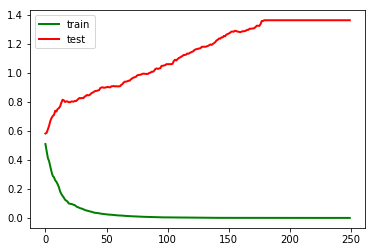

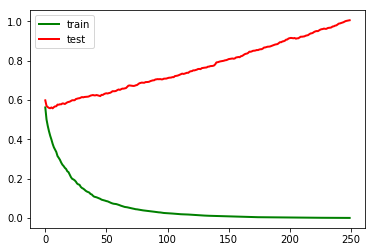

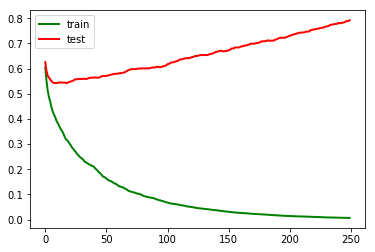

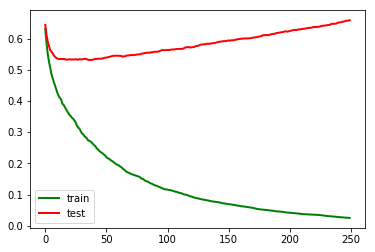

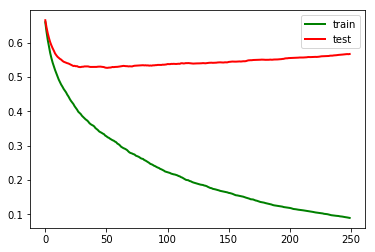

In [113]:
learning_rate = [1, 0.5, 0.3, 0.2, 0.1]
#learning_rate = [0.2]
y_pred = []

for rate in tqdm_notebook(learning_rate):
    clf = GradientBoostingClassifier(n_estimators=250, learning_rate=rate, verbose=True, random_state=241)
    clf.fit(X_train, y_train)
    train_loss = predict(clf, X_train, y_train)
    test_loss = predict(clf, X_test, y_test)
    
    print(min(test_loss), test_loss.index(min(test_loss)))
    
    plt.figure()
    plt.plot(train_loss, 'g', linewidth=2)
    plt.plot(test_loss, 'r', linewidth=2)
    plt.legend(['train', 'test'])
    plt.savefig('rate_' + str(rate) + '.png')

In [115]:
forest_clf = RandomForestClassifier(n_estimators=37, random_state=241)
forest_clf.fit(X_train, y_train)

y_pred_forest = forest_clf.predict_proba(X_test)
print(log_loss(y_test, y_pred_forest))

0.5410941951182815
